In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
titanic = pd.read_csv('../Data/train.csv',sep=",")

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#Convert some variables to Categorical variables

In [12]:
titanic[['Sex', 'Embarked']] = titanic[['Sex', 'Embarked']].apply(lambda x: x.astype('category'))

In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null category
dtypes: category(2), float64(2), int64(5), object(3)
memory usage: 71.6+ KB


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score

In [15]:
#x_col = ['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
x_col = ['SibSp','Parch','Fare']

In [16]:
# Exploratory analysis

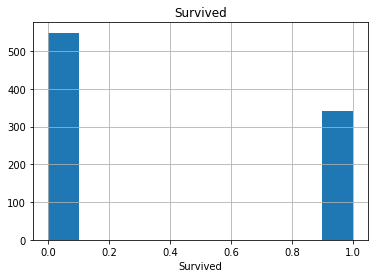

In [28]:
titanic[['Survived']].hist()
plt.xlabel('Survived')
plt.show()

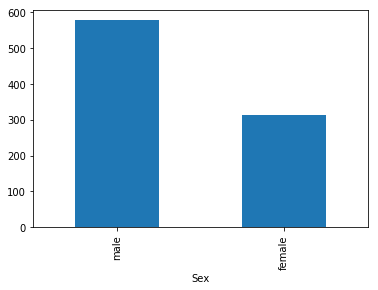

In [31]:
titanic['Sex'].value_counts().plot(kind='bar')
plt.xlabel('Sex')
plt.show()

In [ ]:
# Fit a initial model

In [218]:
X = titanic[x_col].values
y = titanic['Survived'].values

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3)

clf = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors =3)

knn.fit(X_train,y_train)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Random Forest Classifier score {}'.format(clf.score(X_test,y_test)))
print('Random Forest Classifier score {}'.format(knn.score(X_test,y_test)))


Random Forest Classifier score 0.7014925373134329
Random Forest Classifier score 0.6791044776119403


In [282]:
def algorithm_run(titanic,algo, x_col):
    X = titanic[x_col].values
    y = titanic['Survived'].values
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    algo.fit(X_train, y_train)
    print('Random Forest Classifier score {}'.format(clf.score(X_test,y_test)))
    

In [283]:
#Iteration 1:
x_col = ['SibSp','Parch','Fare']
algorithm_run(titanic,RandomForestClassifier(), x_col)

Random Forest Classifier score 0.835820895522388


In [331]:
titanic_nona = titanic.copy

# Iteration 2:

In [345]:
def data_cleanup(titanic_nona):
    #Remove unwanted columns
    titanic_nona.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
    #Remove NAN from embarked column
    titanic_nona = titanic_nona[~titanic_nona.Embarked.isnull()]
    #Convert Sex and Embarked to Dummies
    titanic_nona = pd.get_dummies(titanic_nona)
    #Update Age NAN columns to 0
    titanic_nona.Age = titanic_nona.Age.replace(np.nan,0)
    return(titanic_nona)

In [ ]:
def algorithm_run(titanic,algo, x_col):
    X = titanic[x_col].values
    y = titanic['Survived'].values
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    algo.fit(X_train, y_train)
    print('Random Forest Classifier score {}'.format(clf.score(X_test,y_test)))
    

In [346]:
df = data_cleanup(titanic)

In [354]:
x_col = list(df.drop(['Survived'], axis=1).columns)
algorithm_run(df,RandomForestClassifier(), x_col)

Random Forest Classifier score 0.9325842696629213


In [287]:
#Iteration 2:
#Cleaning data
#Sex


titanic_nona.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

titanic_nona = titanic_nona[~titanic_nona.Embarked.isnull()]
titanic_nona = pd.get_dummies(titanic_nona)
#Age Replace 
#df.insulin.replace(0, np.nan, inplace=True)
titanic_nona.Age = titanic_nona.Age.replace(np.nan,0)

#Complete code

X = titanic_nona[x_col].values
y = titanic_nona['Survived'].values

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3)

clf = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors =3)

knn.fit(X_train,y_train)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Random Forest Classifier score {}'.format(clf.score(X_test,y_test)))
print('KNN Forest Classifier score {}'.format(knn.score(X_test,y_test)))


# Iteration 3:

In [409]:
def data_cleanup(titanic_nona):
    #Remove unwanted columns
    titanic_nona.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
    #Remove NAN from embarked column
    titanic_nona = titanic_nona[~titanic_nona.Embarked.isnull()]
    #Convert Sex and Embarked to Dummies
    titanic_nona = pd.get_dummies(titanic_nona)
    #Update Age NAN columns to 0
    titanic_nona.Age = titanic_nona.Age.replace(np.nan,0)

    return(titanic_nona)

In [407]:
df = data_cleanup(titanic)

In [413]:
def algorithm_run(df,algo, x_col):
    X = df[x_col].values
    y = df['Survived'].values
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    algo.fit(X_train, y_train)
    cv_results = cross_val_score(algo,X,y,cv=5)
    
    print('Random Forest Classifier score {}'.format(clf.score(X_test,y_test)))
    print('Cross Validation Score {}'.format(np.mean(cv_results)))


In [522]:
x_col = list(df.drop(['Survived'], axis=1).columns)
algorithm_run(df,RandomForestClassifier(), x_col)

Random Forest Classifier score 0.9138576779026217
Cross Validation Score 0.7963816415920777


In [459]:
titanic_test1 = pd.read_csv('../Data/test.csv',sep=",")

In [439]:
df_test = data_cleanup(titanic_test)

In [441]:
df_test.tail()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
413,3,0.0,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,0.0,0,0,8.0500,0,1,0,0,1
417,3,0.0,1,1,22.3583,0,1,1,0,0


In [443]:
clf = RandomForestClassifier()

X = df[x_col].values
y = df['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
clf.fit(X_train, y_train)
cv_results = cross_val_score(clf,X,y,cv=5)
print('Random Forest Classifier score {}'.format(clf.score(X_test,y_test)))
print('Cross Validation Score {}'.format(np.mean(cv_results)))

Random Forest Classifier score 0.7752808988764045
Cross Validation Score 0.7997778200977592


In [454]:
df_test.Fare.fillna(np.mean(df_test.Fare),inplace=True)

In [467]:
y_predicted = clf.predict(df_test)

In [476]:
type(y_predicted)

numpy.ndarray

In [479]:
final_output = pd.DataFrame(titanic_test1.iloc[:,0])
final_output['Survived'] = y_predicted


In [480]:
final_output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0


In [483]:
final_output.to_csv('submission.csv',index_label=False,index=False)

In [489]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [503]:
X = titanic.drop(['Survived','PassengerId','Name','Ticket','Cabin'],axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [519]:
cat_features = ['Embarked']

In [515]:
X_train_cat

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0,